## Evaluation of the datasets with CICFlowmeter

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir=root_dir+'proyecto_grado_redes/evaluation_datasets/'

Mounted at /content/gdrive


In [2]:
import pandas as pd

## Reading the dataset

In [3]:
df_cic_normal1_org=pd.read_csv(base_dir+"csv_original/cicbelldns2021_benign_pcap_Flow.csv")
df_cic_normal1_org['Label'] = df_cic_normal1_org['Label'].map({'NeedManualLabel': 'Normal'})

In [4]:
df_cic_attack1_org=pd.read_csv(base_dir+"csv_original/cicbelldns2021_malware_pcap_Flow.csv")
df_cic_attack1_org['Label'] = df_cic_attack1_org['Label'].map({'NeedManualLabel': 'Attack'})

In [5]:
df_cic_attack2_org=pd.read_csv(base_dir+"csv_original/cicbelldns2021_phishing_pcap_Flow.csv")
df_cic_attack2_org['Label'] = df_cic_attack2_org['Label'].map({'NeedManualLabel': 'Attack'})

In [6]:
df_cic_attack3_org=pd.read_csv(base_dir+"csv_original/cicbelldns2021_spam_pcap_Flow.csv")
df_cic_attack3_org['Label'] = df_cic_attack3_org['Label'].map({'NeedManualLabel': 'Attack'})

In [7]:
df_cic_normal1_srg=pd.read_csv(base_dir+"csv_modified/cicbelldns2021_benign_pcap_Flow.csv")
df_cic_normal1_srg['Label'] = df_cic_normal1_srg['Label'].map({'ManualLabel': 'Normal'})

In [8]:
df_cic_attack1_srg=pd.read_csv(base_dir+"csv_modified/cicbelldns2021_malware_pcap_Flow.csv")
df_cic_attack1_srg['Label'] = df_cic_attack1_srg['Label'].map({'ManualLabel': 'Attack'})

In [9]:
df_cic_attack2_srg=pd.read_csv(base_dir+"csv_modified/cicbelldns2021_phishing_pcap_Flow.csv")
df_cic_attack2_srg['Label'] = df_cic_attack2_srg['Label'].map({'ManualLabel': 'Attack'})

In [10]:
df_cic_attack3_srg=pd.read_csv(base_dir+"csv_modified/cicbelldns2021_spam_pcap_Flow.csv")
df_cic_attack3_srg['Label'] = df_cic_attack3_srg['Label'].map({'ManualLabel': 'Attack'})

## ML

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [12]:
def get_score (model,x_test, y_test):
    score = model.score(x_test, y_test)
    print (f'{model}\nscore: {score}')

In [13]:
def evaluate_model (model,x_test,y_test):
    y_predicted = model.predict(x_test)
    cm = confusion_matrix(y_test, y_predicted)    
    print(classification_report(y_test,y_predicted))
    get_accuracy(cm)
    plt.figure(figsize=(18,12))
    sn.heatmap(cm, annot=True)
    plt.xlabel('Predicted', fontsize=24)
    plt.ylabel('Truth',fontsize=24)

In [14]:
def get_accuracy(cm):
    tn=cm[0][0]
    tp=cm[1][1]
    fn=cm[0][1]
    fp=cm[1][0]
    fpr=fp/(fp+tn)
    fnr=fn/(fn+tp)
    far=(fpr+fnr)/2
    acc=(tp+tn)/(tp+tn+fp+fn)
    print(f'False positive rate FPR: {fpr}\nFalse negative rate FNR: {fnr}\nFAR: {far}\nAccuracy: {acc}')

## Original Evaluation

In [15]:
df_org=pd.concat([df_cic_normal1_org,df_cic_attack1_org,df_cic_attack2_org,df_cic_attack3_org],axis='index')
df_org = df_org.reset_index()

In [16]:
df_org=df_org.sample(frac=1).reset_index(drop=True)
#df_org = shuffle(df_org)
df_org.drop(columns=['index','Flow ID','Src IP','Src Port','Dst IP','Dst Port','Timestamp'],inplace=True)
traffic={'Normal':0,'Attack':1}
df_org.replace({'Label':traffic},inplace=True)

In [17]:
df_org.replace([np.inf, -np.inf], np.nan, inplace=True)
df_org=df_org.apply(lambda x: x.fillna(x.mean()),axis=0)

In [18]:
input = df_org.drop(columns=['Label'])
target = df_org['Label']

x_train, x_test, y_train, y_test = train_test_split(input ,target, train_size=0.7 ,random_state=2)

#### Random Forest Classifier

RandomForestClassifier()
score: 0.9951374207188161
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4537
           1       0.99      0.89      0.94       193

    accuracy                           1.00      4730
   macro avg       0.99      0.94      0.97      4730
weighted avg       1.00      1.00      1.00      4730

False positive rate FPR: 0.004826678367705134
False negative rate FNR: 0.005813953488372093
FAR: 0.005320315928038614
Accuracy: 0.9951374207188161
RandomForestClassifier(n_estimators=200)
score: 0.9945031712473573
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4537
           1       0.99      0.87      0.93       193

    accuracy                           0.99      4730
   macro avg       0.99      0.94      0.96      4730
weighted avg       0.99      0.99      0.99      4730

False positive rate FPR: 0.005481254110940584
False negative rate FNR: 0.00591715

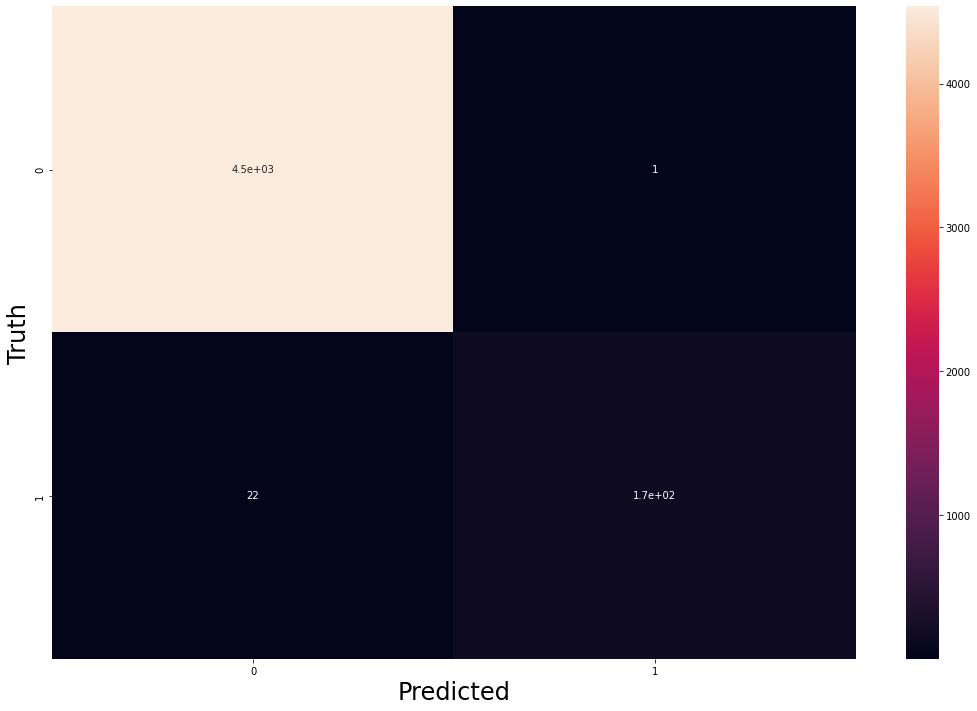

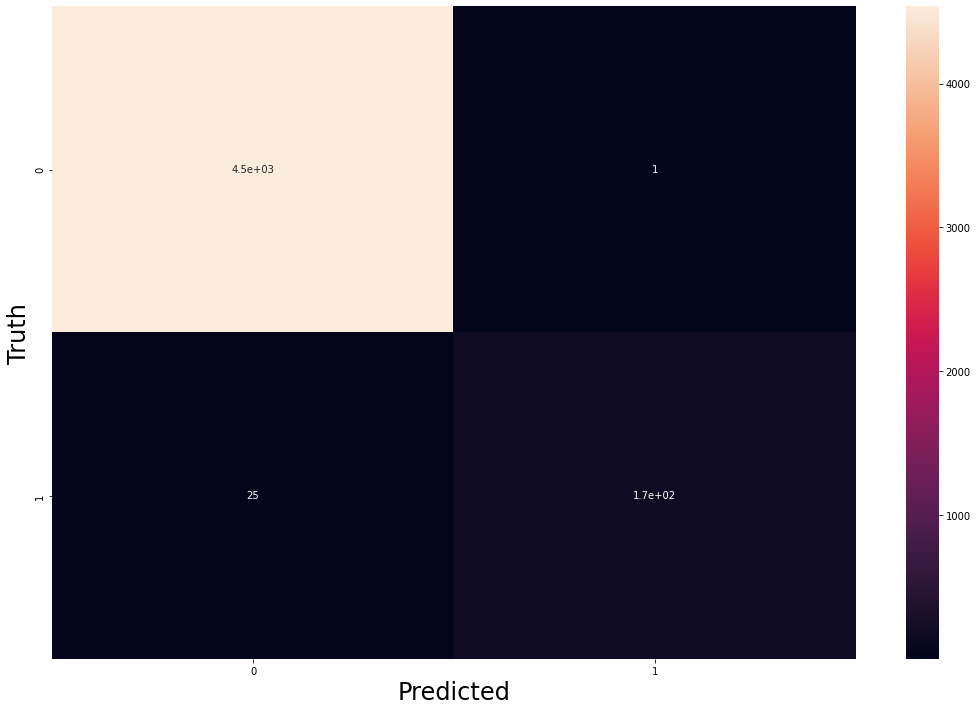

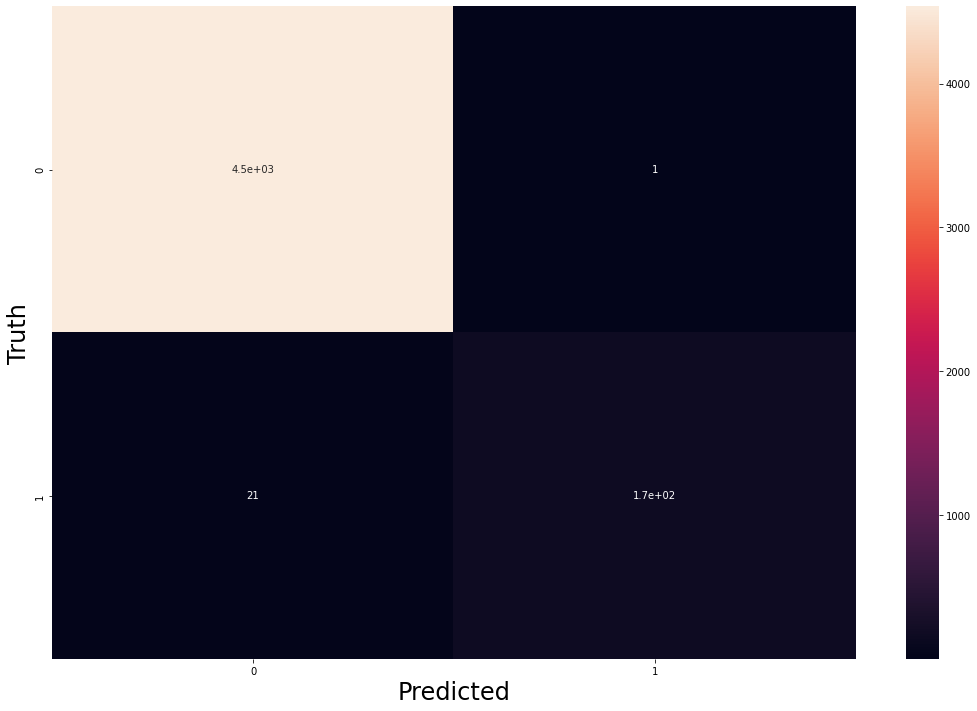

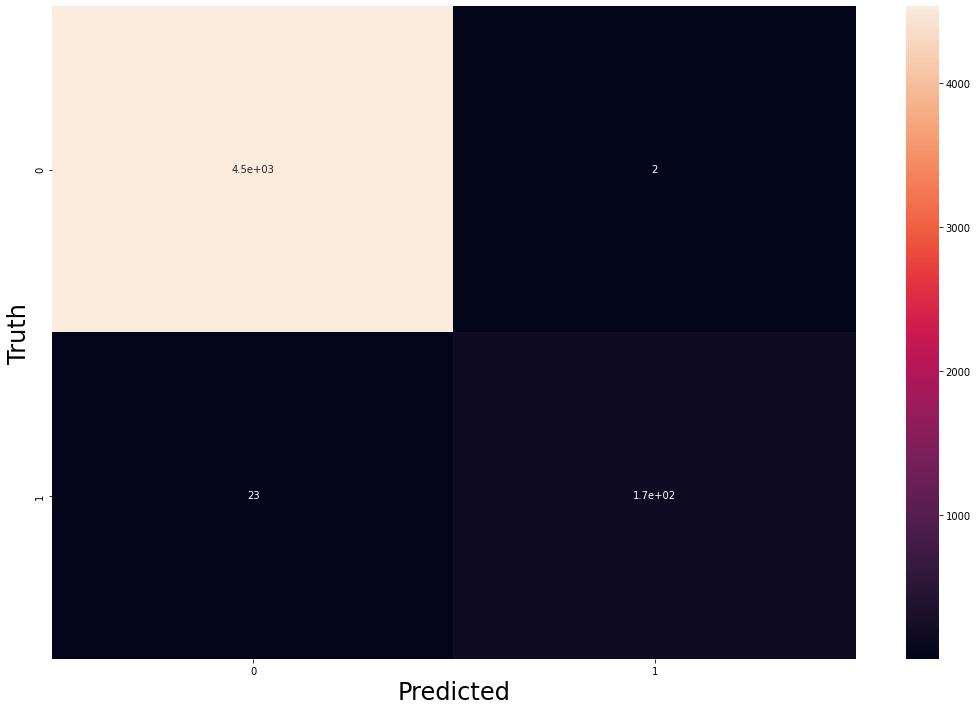

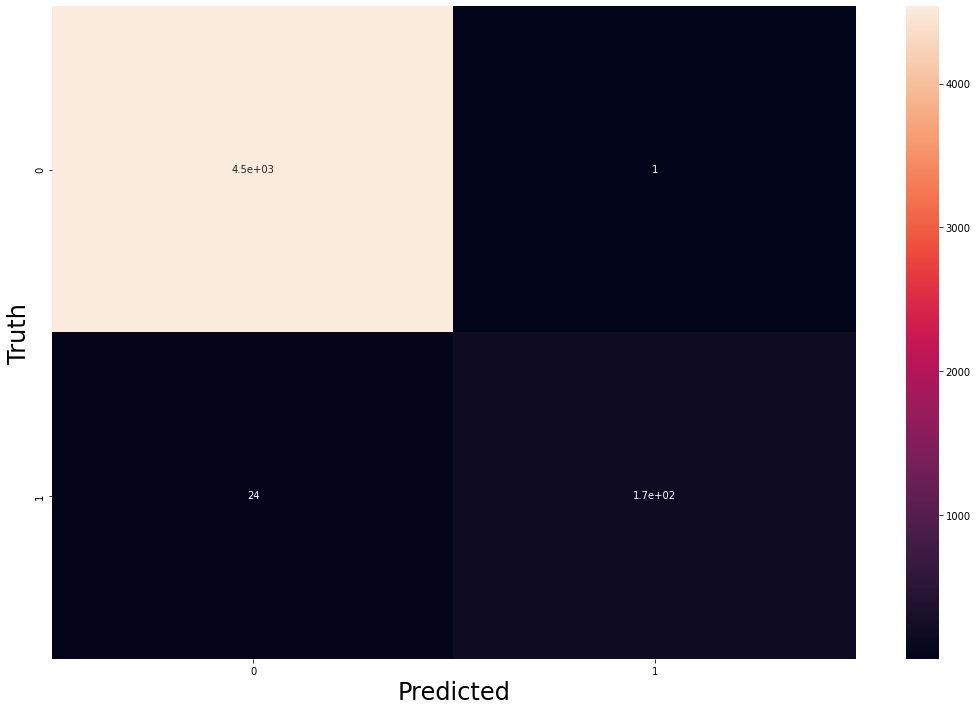

In [ ]:
n=[100,200,300,400,500]
for it in range(len(n)):
    rt_model = RandomForestClassifier(n_estimators=n[it])
    rt_model.fit(x_train,y_train)
    get_score(rt_model,x_test,y_test)
    evaluate_model(rt_model,x_test,y_test)

#### SVM

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Run

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4537
           1       0.00      0.00      0.00       193

    accuracy                           0.96      4730
   macro avg       0.48      0.50      0.49      4730
weighted avg       0.92      0.96      0.94      4730

False positive rate FPR: 0.04080338266384778
False negative rate FNR: nan
FAR: nan
Accuracy: 0.9591966173361522


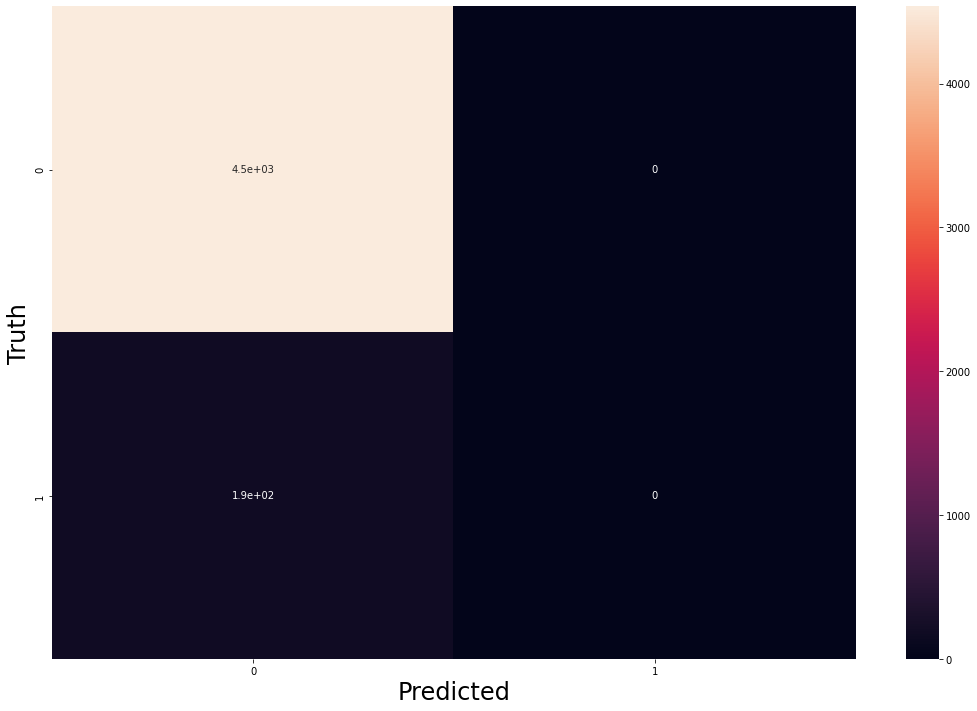

In [ ]:
svm_model = SVC()
svm_model.fit(x_train,y_train)
#get_score(svm_model,x_test,y_test)
evaluate_model(svm_model,x_test,y_test)

#### Gaussian 

GaussianNB()
score: 0.29978858350951376
              precision    recall  f1-score   support

           0       0.99      0.27      0.43      4537
           1       0.05      0.95      0.10       193

    accuracy                           0.30      4730
   macro avg       0.52      0.61      0.26      4730
weighted avg       0.95      0.30      0.41      4730

False positive rate FPR: 0.007240547063555913
False negative rate FNR: 0.9472325781474047
FAR: 0.4772365626054803
Accuracy: 0.29978858350951376


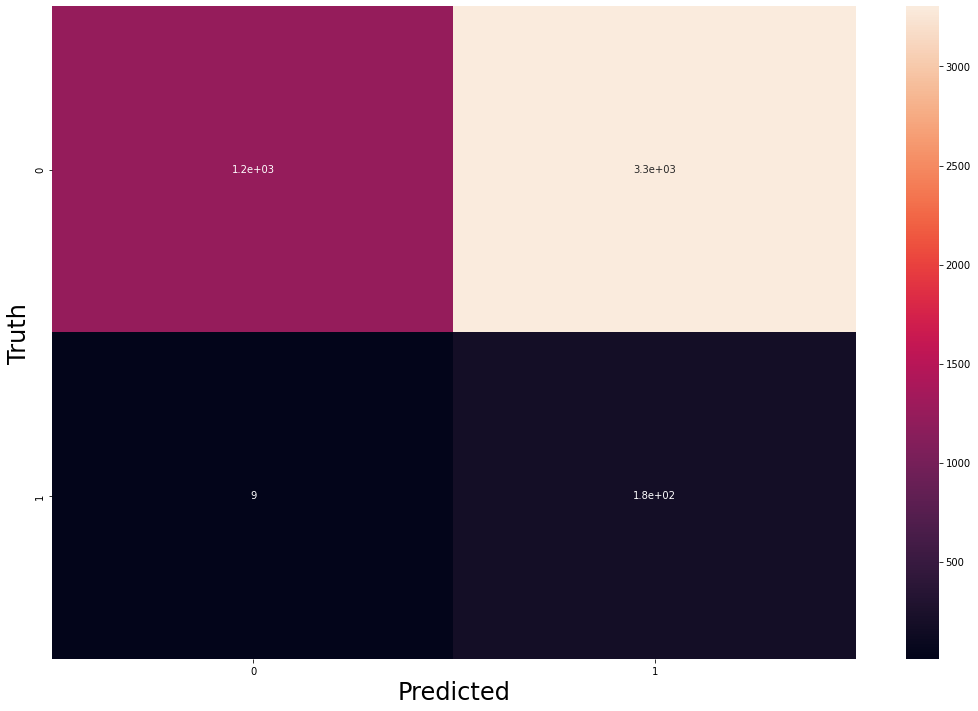

In [ ]:
bayes_model = GaussianNB()
bayes_model.fit(x_train,y_train)
get_score(bayes_model,x_test,y_test)
evaluate_model(bayes_model,x_test,y_test)

#### Linear Discriminant

LinearDiscriminantAnalysis()
score: 0.9883720930232558
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4537
           1       0.89      0.81      0.85       193

    accuracy                           0.99      4730
   macro avg       0.94      0.90      0.92      4730
weighted avg       0.99      0.99      0.99      4730

False positive rate FPR: 0.007905138339920948
False negative rate FNR: 0.10795454545454546
FAR: 0.0579298418972332
Accuracy: 0.9883720930232558


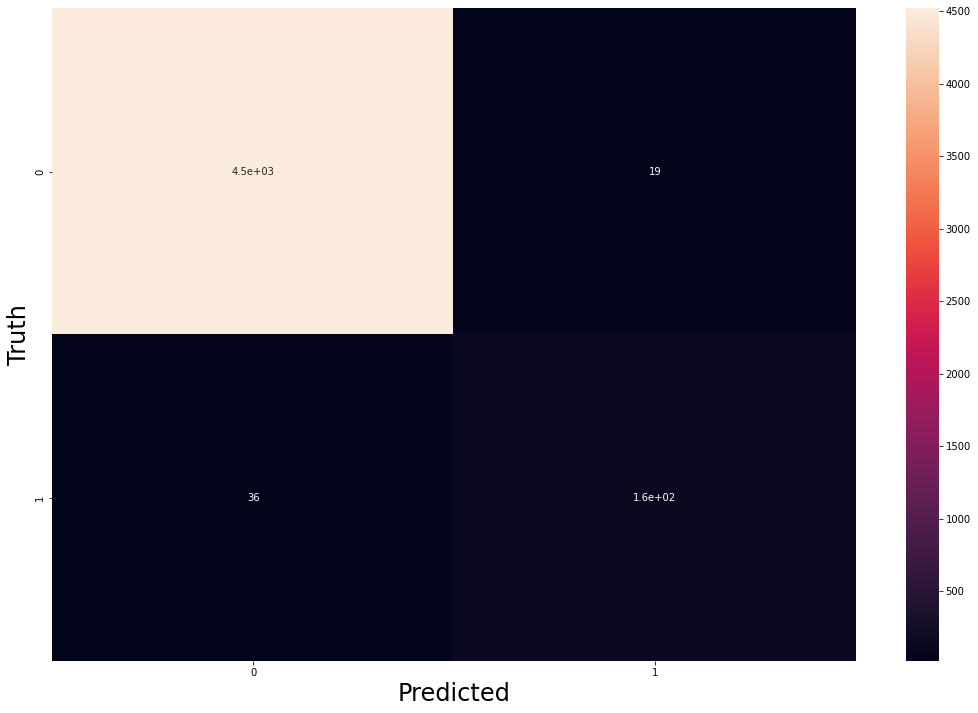

In [ ]:
ld_model = LinearDiscriminantAnalysis()
ld_model.fit(x_train,y_train)
get_score(ld_model,x_test,y_test)
evaluate_model(ld_model,x_test,y_test)

#### KNN

KNeighborsClassifier(n_neighbors=3)
score: 0.9547568710359408
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4537
           1       0.18      0.03      0.05       193

    accuracy                           0.95      4730
   macro avg       0.57      0.51      0.51      4730
weighted avg       0.93      0.95      0.94      4730

False positive rate FPR: 0.03981264637002342
False negative rate FNR: 0.8181818181818182
FAR: 0.42899723227592085
Accuracy: 0.9547568710359408
KNeighborsClassifier()
score: 0.9583509513742072
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4537
           1       0.30      0.02      0.03       193

    accuracy                           0.96      4730
   macro avg       0.63      0.51      0.50      4730
weighted avg       0.93      0.96      0.94      4730

False positive rate FPR: 0.04025423728813559
False negative rate FNR: 0.7
FAR: 0.37012711864

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Run

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4537
           1       0.00      0.00      0.00       193

    accuracy                           0.96      4730
   macro avg       0.48      0.50      0.49      4730
weighted avg       0.92      0.96      0.94      4730

False positive rate FPR: 0.04080338266384778
False negative rate FNR: nan
FAR: nan
Accuracy: 0.9591966173361522


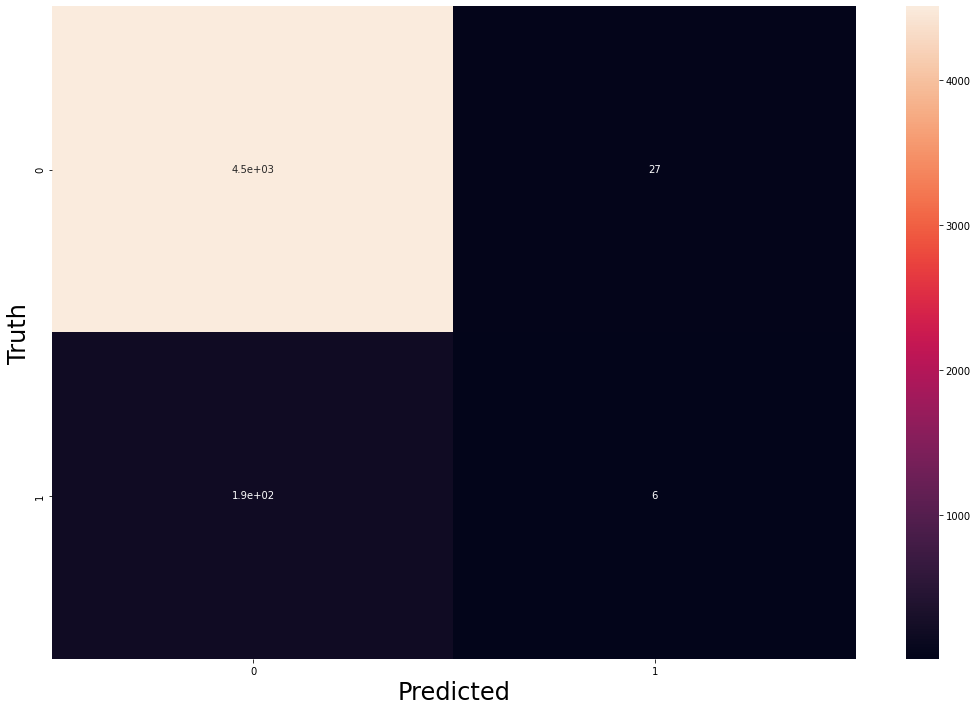

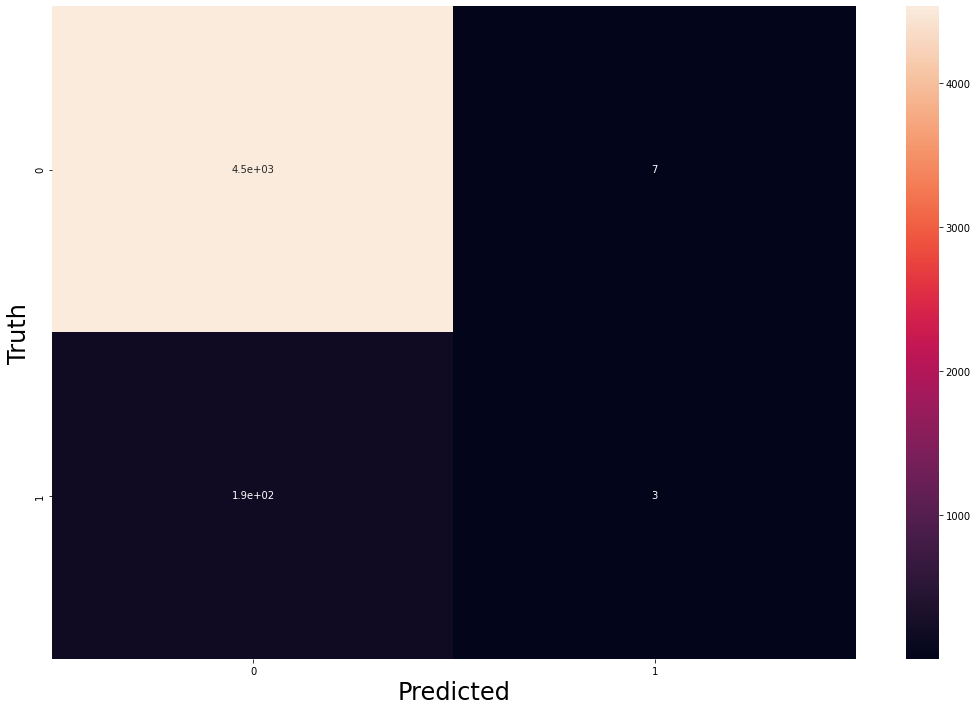

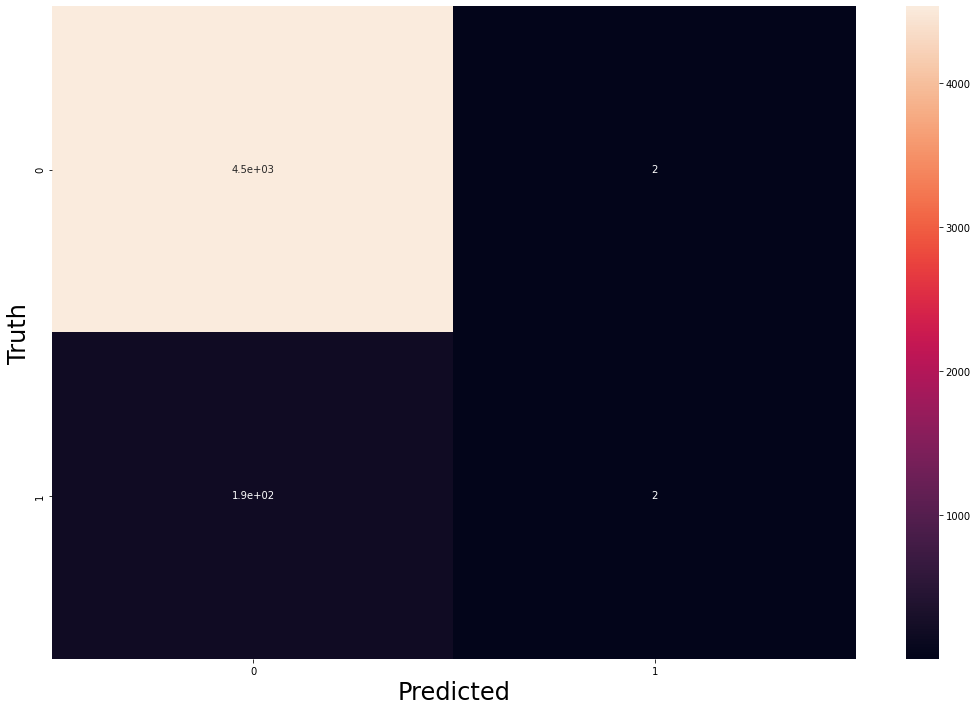

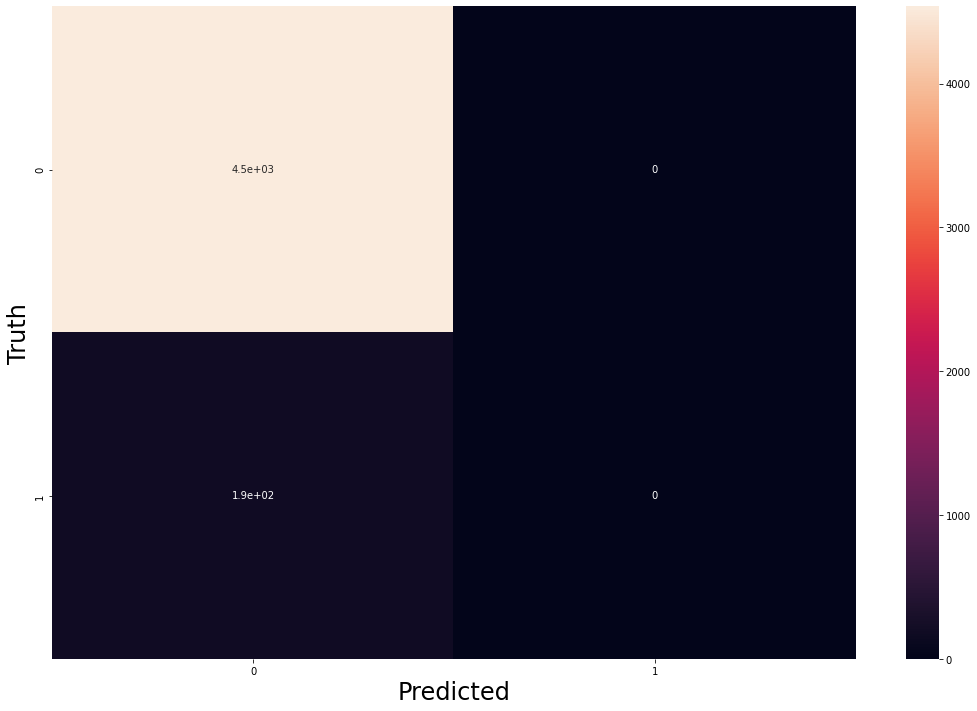

In [ ]:
n=[3,5,7,9]
for i in range(len(n)):  
  KNN_model = KNeighborsClassifier(n_neighbors=n[i])
  KNN_model.fit(x_train, y_train)
  get_score(KNN_model,x_test,y_test)
  evaluate_model(KNN_model,x_test,y_test)

#### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=1000000)
score: 0.9727272727272728
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4537
           1       0.79      0.46      0.58       193

    accuracy                           0.97      4730
   macro avg       0.88      0.73      0.78      4730
weighted avg       0.97      0.97      0.97      4730

False positive rate FPR: 0.0227371156344738
False negative rate FNR: 0.21428571428571427
FAR: 0.11851141496009404
Accuracy: 0.9727272727272728


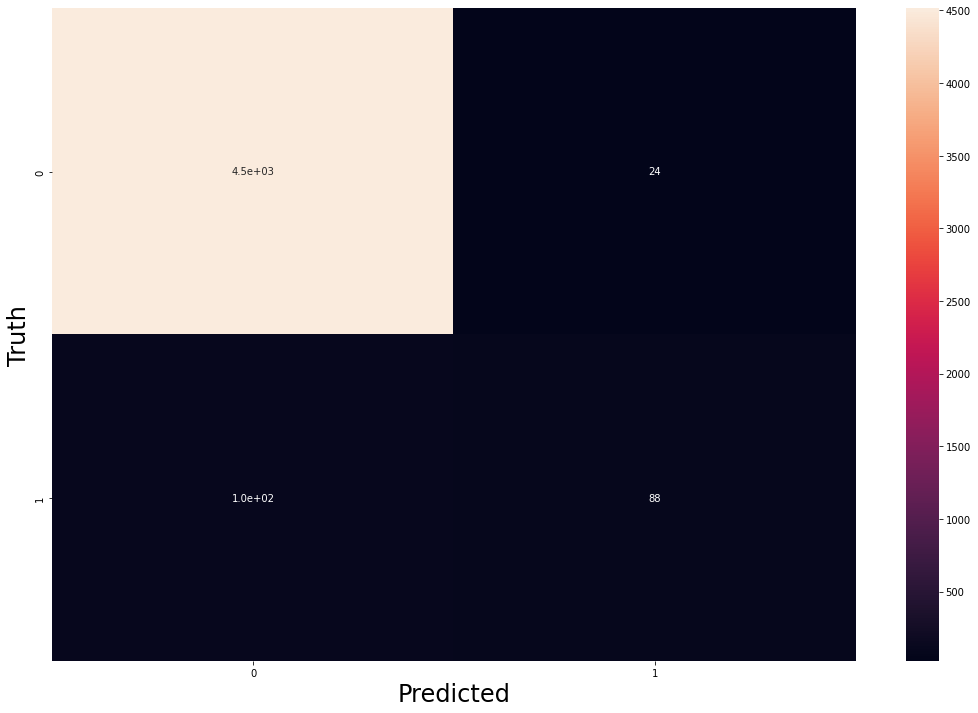

In [ ]:
lr_model = LogisticRegression(max_iter=1000000)
lr_model.fit(x_train,y_train)
get_score(lr_model,x_test,y_test)
evaluate_model(lr_model,x_test,y_test)

#### Cross Validation

In [19]:
model = RandomForestClassifier(n_estimators=400)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.9951 (+/- 0.00)
[0.99524263 0.99524263 0.99492547 0.99429115 0.99555838]


In [20]:
model = RandomForestClassifier(n_estimators=500)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.9951 (+/- 0.00)
[0.99555978 0.99524263 0.99492547 0.99429115 0.99555838]


## Modified Evaluation

In [21]:
df_srg=pd.concat([df_cic_normal1_srg,df_cic_attack1_srg,df_cic_attack2_srg,df_cic_attack3_srg],axis='index')
df_srg = df_srg.reset_index()

In [22]:
df_srg=df_srg.sample(frac=1).reset_index(drop=True)
#df_srg = shuffle(df_srg)
df_srg.drop(columns=['index','Flow ID','Src IP','Src Port','Dst IP','Dst Port','Timestamp'],inplace=True)
traffic={'Normal':0,'Attack':1}
df_srg.replace({'Label':traffic},inplace=True)

In [23]:
df_srg.replace([np.inf, -np.inf], np.nan, inplace=True)
df_srg=df_srg.apply(lambda x: x.fillna(x.mean()),axis=0)

In [24]:
input = df_srg.drop(columns=['Label'])
target = df_srg['Label']

x_train, x_test, y_train, y_test = train_test_split(input ,target, train_size=0.7 ,random_state=2)

#### Random Forest Classifier

RandomForestClassifier()
score: 0.9966173361522199
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4552
           1       0.99      0.92      0.95       178

    accuracy                           1.00      4730
   macro avg       1.00      0.96      0.98      4730
weighted avg       1.00      1.00      1.00      4730

False positive rate FPR: 0.0032851511169513796
False negative rate FNR: 0.006097560975609756
FAR: 0.004691356046280568
Accuracy: 0.9966173361522199
RandomForestClassifier(n_estimators=200)
score: 0.9966173361522199
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4552
           1       0.99      0.92      0.95       178

    accuracy                           1.00      4730
   macro avg       1.00      0.96      0.98      4730
weighted avg       1.00      1.00      1.00      4730

False positive rate FPR: 0.0032851511169513796
False negative rate FNR: 0.006097

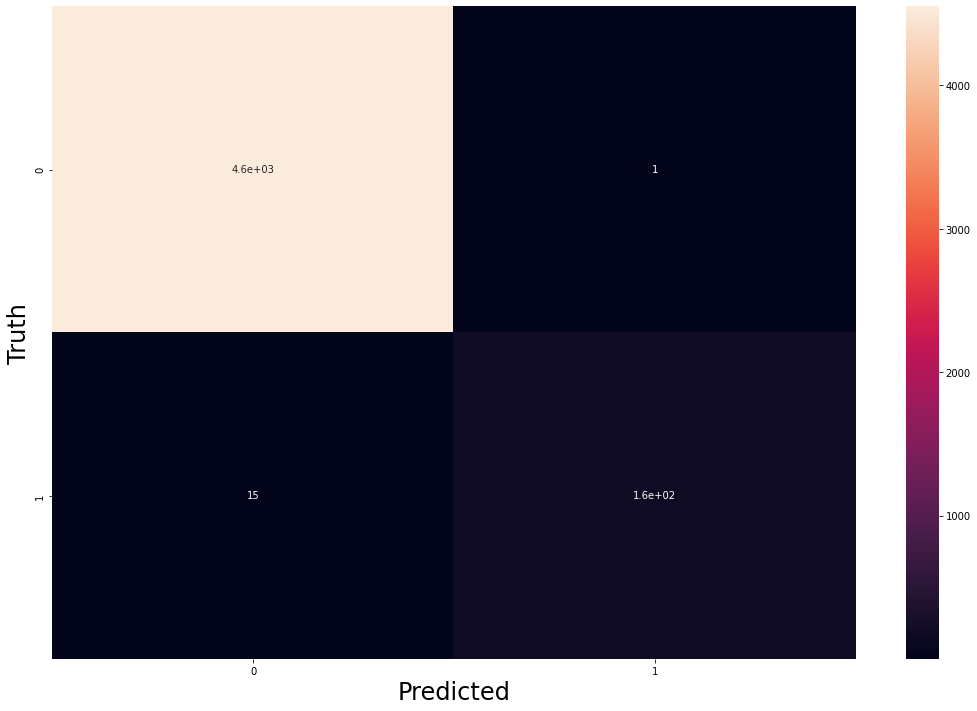

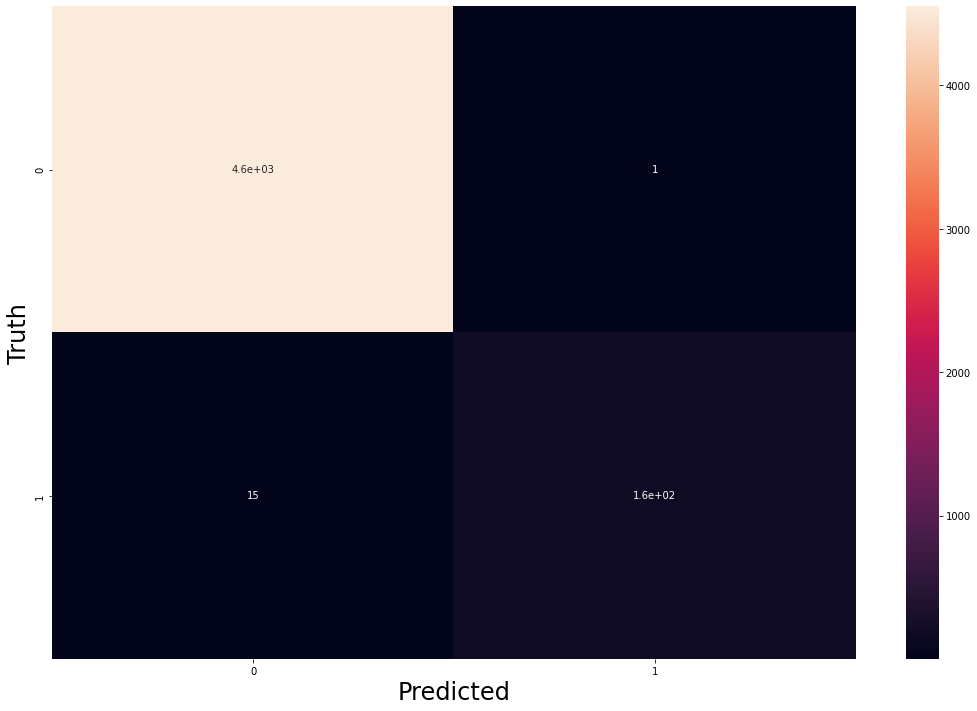

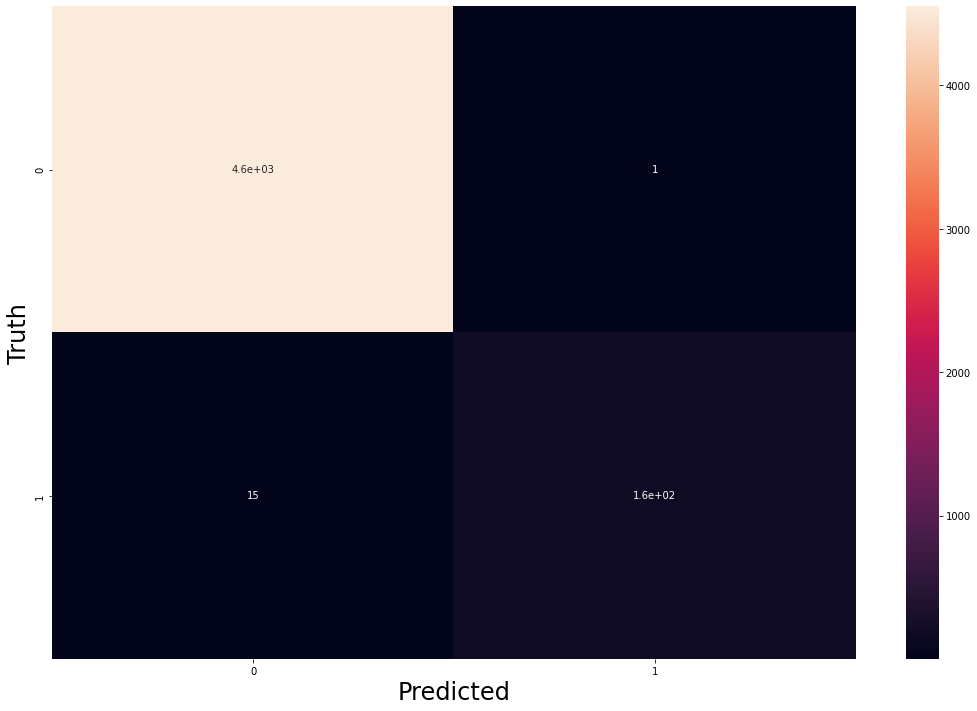

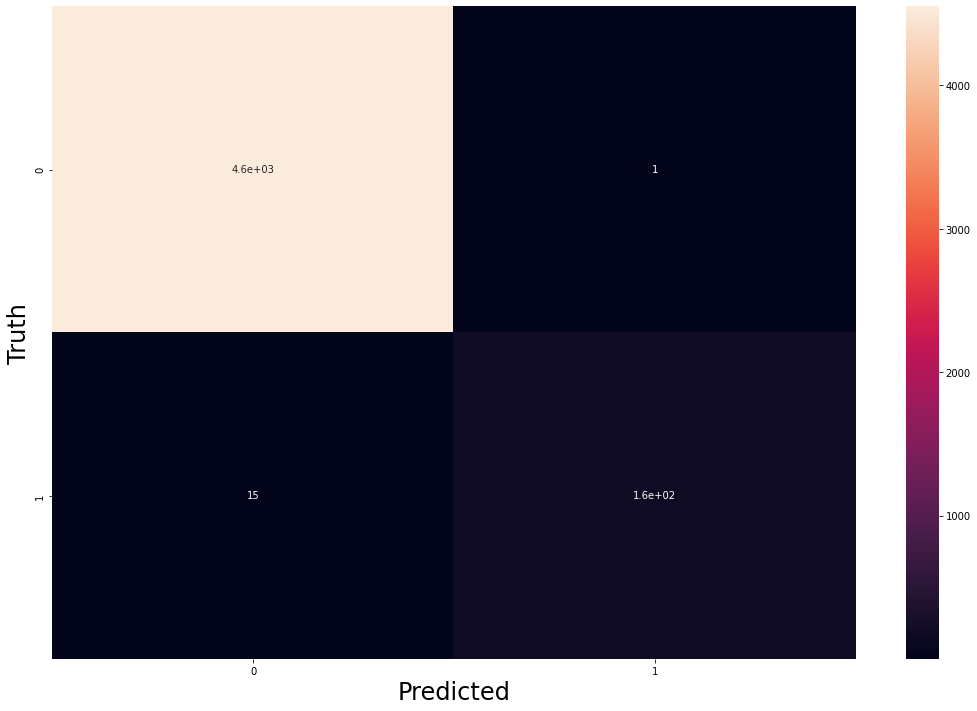

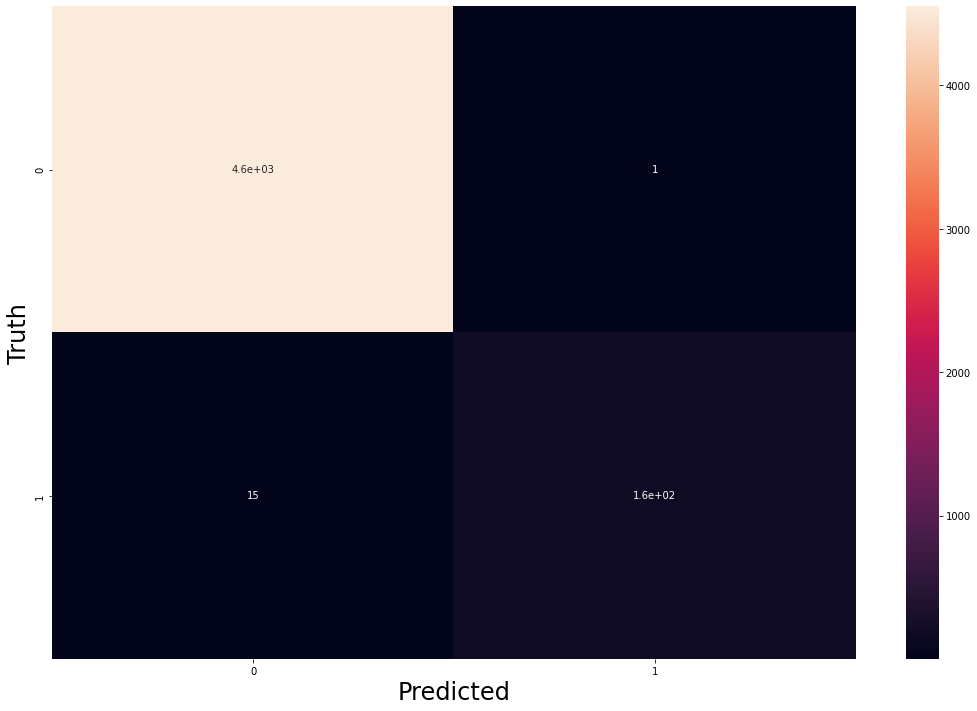

In [ ]:
n=[100,200,300,400,500]
for it in range(len(n)):
    rt_model = RandomForestClassifier(n_estimators=n[it])
    rt_model.fit(x_train,y_train)
    get_score(rt_model,x_test,y_test)
    evaluate_model(rt_model,x_test,y_test)

#### SVM

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Run

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4552
           1       0.00      0.00      0.00       178

    accuracy                           0.96      4730
   macro avg       0.48      0.50      0.49      4730
weighted avg       0.93      0.96      0.94      4730

False positive rate FPR: 0.03763213530655391
False negative rate FNR: nan
FAR: nan
Accuracy: 0.962367864693446


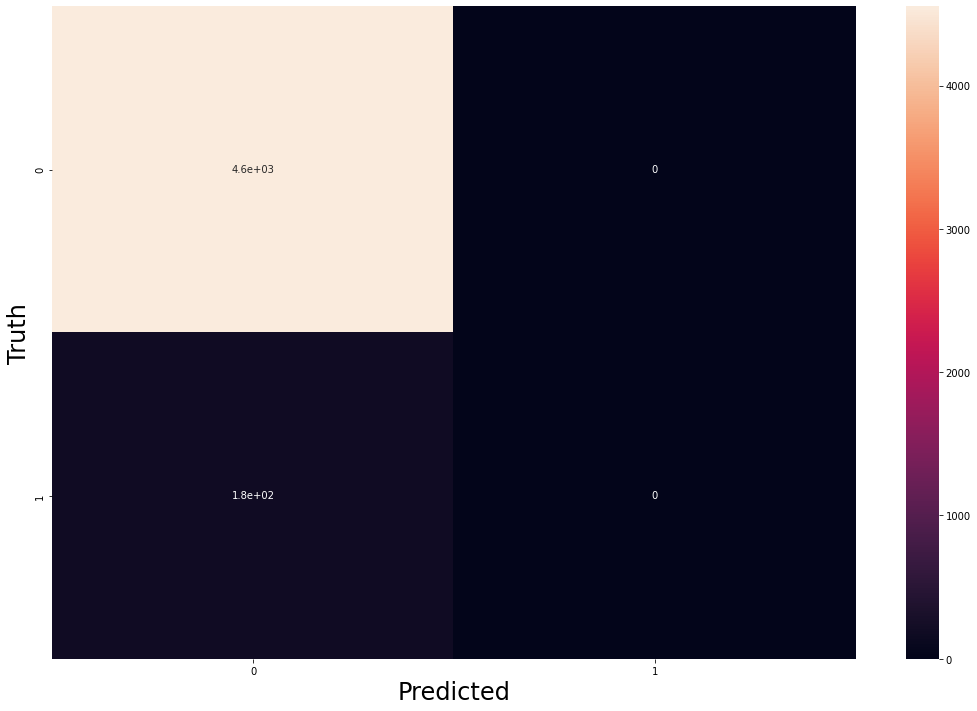

In [ ]:
svm_model = SVC()
svm_model.fit(x_train,y_train)
#get_score(svm_model,x_test,y_test)
evaluate_model(svm_model,x_test,y_test)

#### Gaussian 

GaussianNB()
score: 0.12452431289640592
              precision    recall  f1-score   support

           0       0.98      0.09      0.17      4552
           1       0.04      0.96      0.08       178

    accuracy                           0.12      4730
   macro avg       0.51      0.52      0.12      4730
weighted avg       0.95      0.12      0.16      4730

False positive rate FPR: 0.01873536299765808
False negative rate FNR: 0.9604926795259121
FAR: 0.4896140212617851
Accuracy: 0.12452431289640592


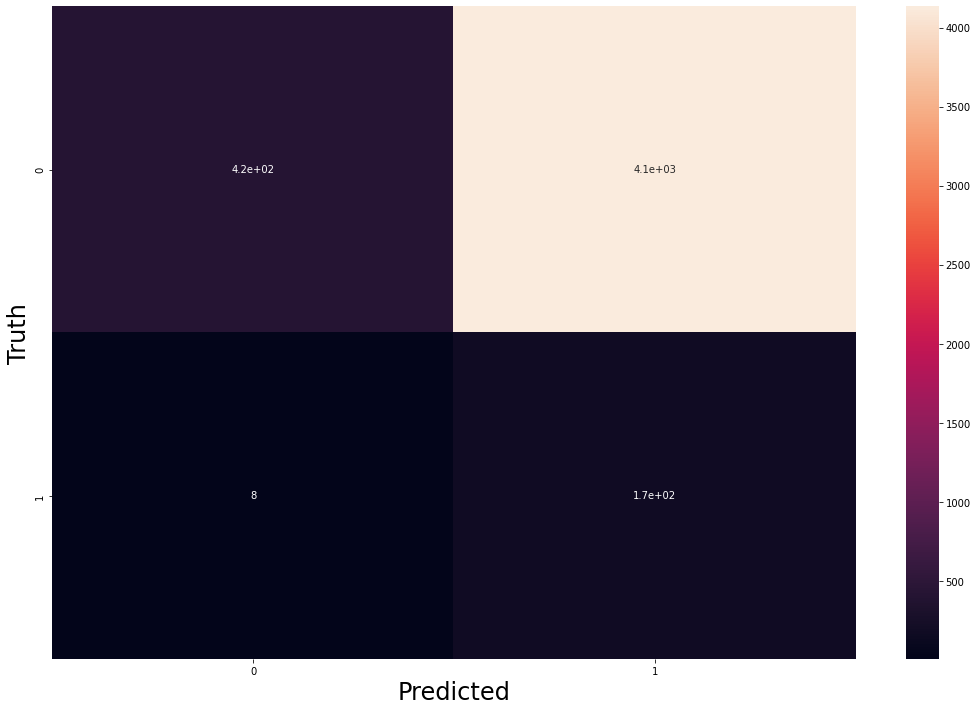

In [ ]:
bayes_model = GaussianNB()
bayes_model.fit(x_train,y_train)
get_score(bayes_model,x_test,y_test)
evaluate_model(bayes_model,x_test,y_test)

#### Linear Discriminant

LinearDiscriminantAnalysis()
score: 0.986892177589852
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4552
           1       0.91      0.72      0.81       178

    accuracy                           0.99      4730
   macro avg       0.95      0.86      0.90      4730
weighted avg       0.99      0.99      0.99      4730

False positive rate FPR: 0.010893246187363835
False negative rate FNR: 0.08571428571428572
FAR: 0.04830376595082478
Accuracy: 0.986892177589852


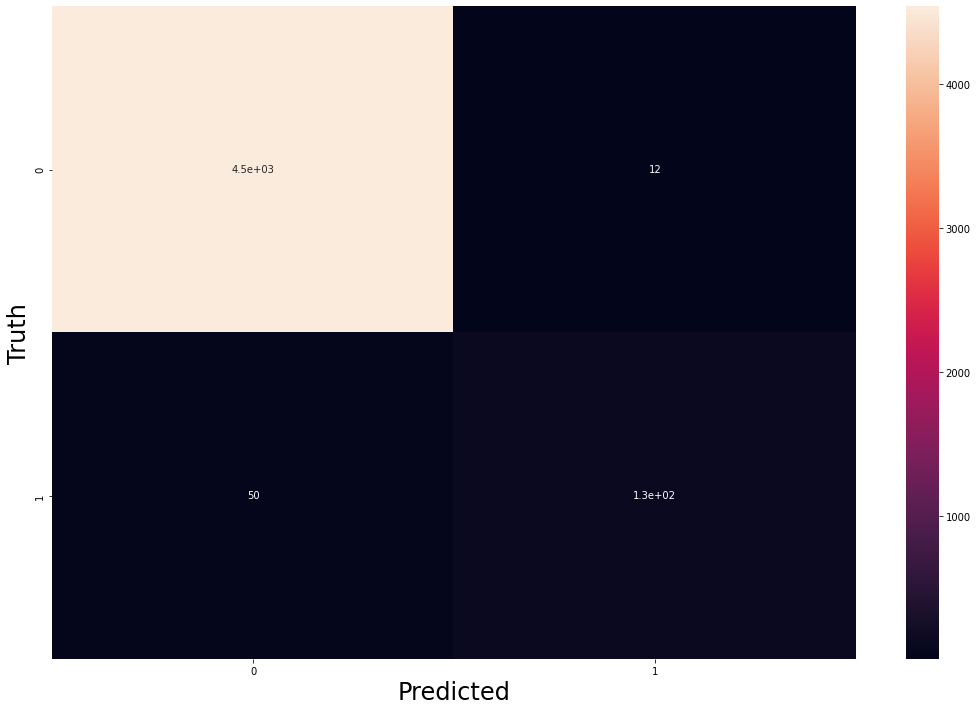

In [ ]:
ld_model = LinearDiscriminantAnalysis()
ld_model.fit(x_train,y_train)
get_score(ld_model,x_test,y_test)
evaluate_model(ld_model,x_test,y_test)

#### KNN

KNeighborsClassifier(n_neighbors=3)
score: 0.9640591966173362
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4552
           1       0.63      0.11      0.18       178

    accuracy                           0.96      4730
   macro avg       0.80      0.55      0.58      4730
weighted avg       0.95      0.96      0.95      4730

False positive rate FPR: 0.033829787234042556
False negative rate FNR: 0.36666666666666664
FAR: 0.2002482269503546
Accuracy: 0.9640591966173362
KNeighborsClassifier()
score: 0.9644820295983086
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4552
           1       0.86      0.07      0.12       178

    accuracy                           0.96      4730
   macro avg       0.91      0.53      0.55      4730
weighted avg       0.96      0.96      0.95      4730

False positive rate FPR: 0.035199321458863446
False negative rate FNR: 0.14285714285714285


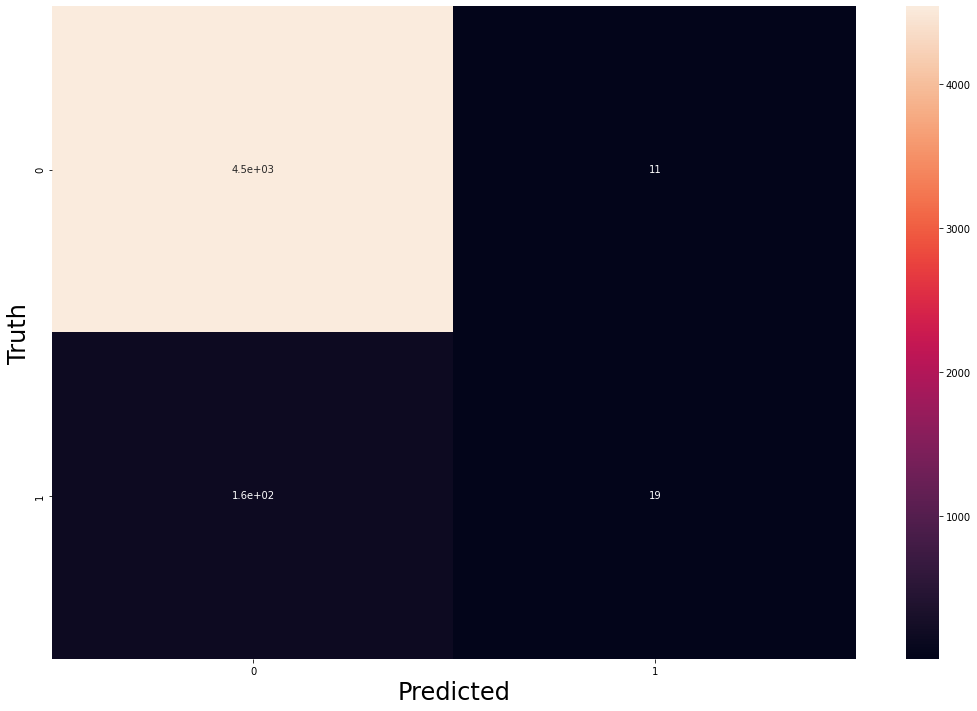

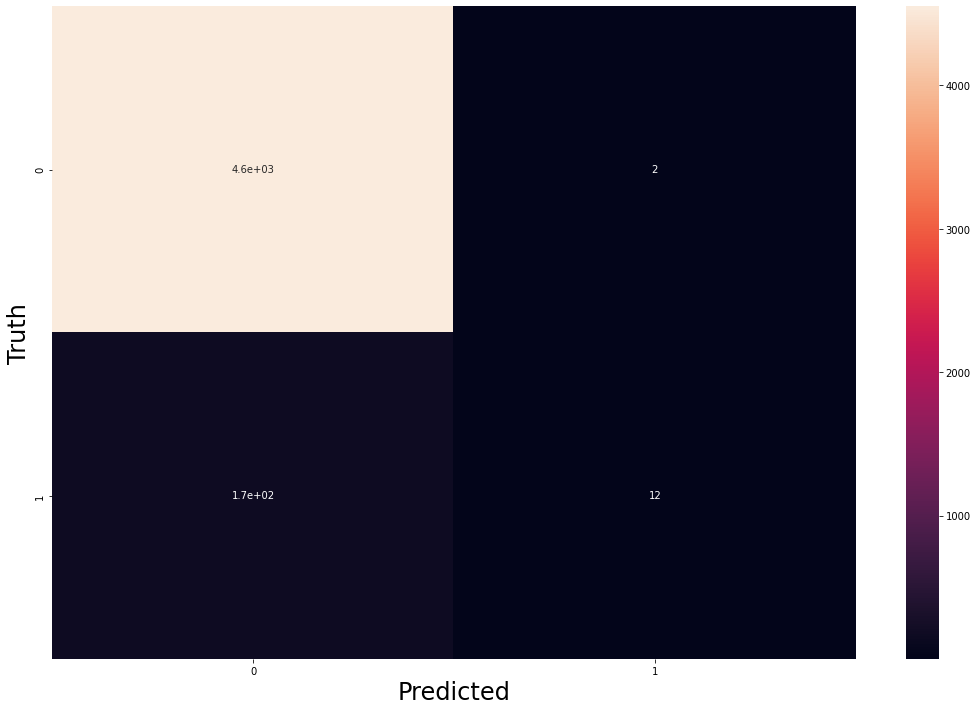

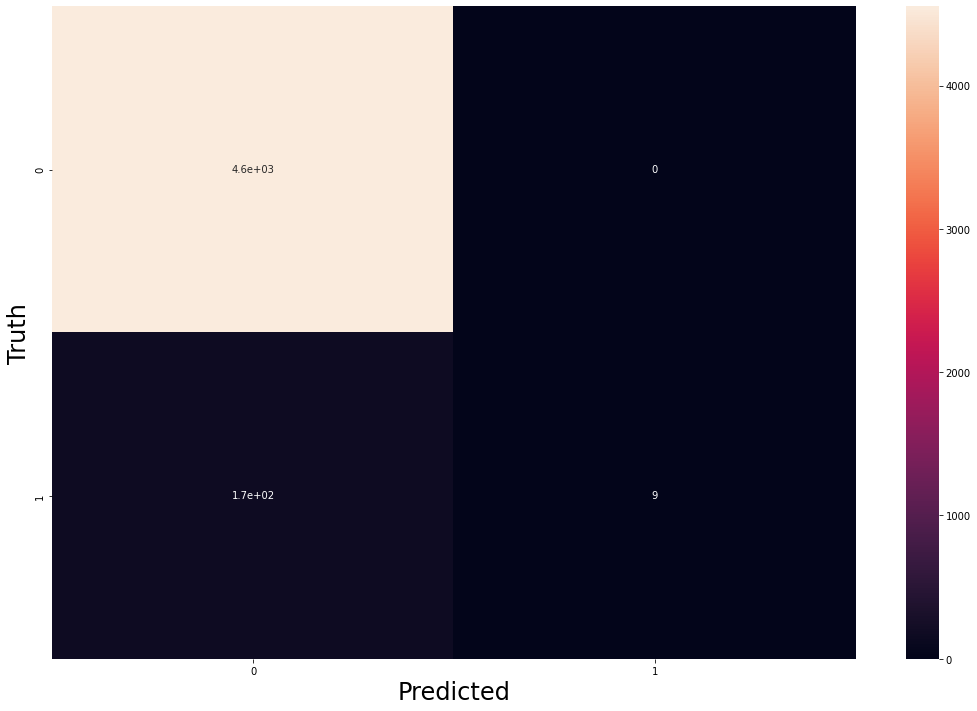

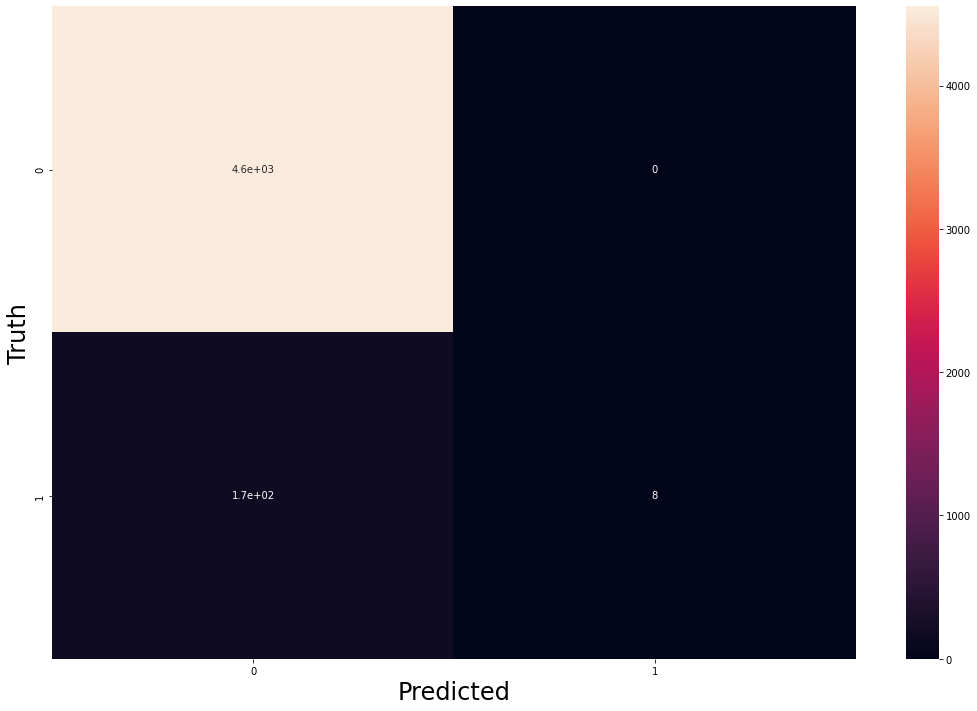

In [ ]:
n=[3,5,7,9]
for i in range(len(n)):  
  KNN_model = KNeighborsClassifier(n_neighbors=n[i])
  KNN_model.fit(x_train, y_train)
  get_score(KNN_model,x_test,y_test)
  evaluate_model(KNN_model,x_test,y_test)

#### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=1000000)
score: 0.9835095137420719
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4552
           1       0.92      0.62      0.74       178

    accuracy                           0.98      4730
   macro avg       0.95      0.81      0.86      4730
weighted avg       0.98      0.98      0.98      4730

False positive rate FPR: 0.01475054229934924
False negative rate FNR: 0.08333333333333333
FAR: 0.04904193781634129
Accuracy: 0.9835095137420719


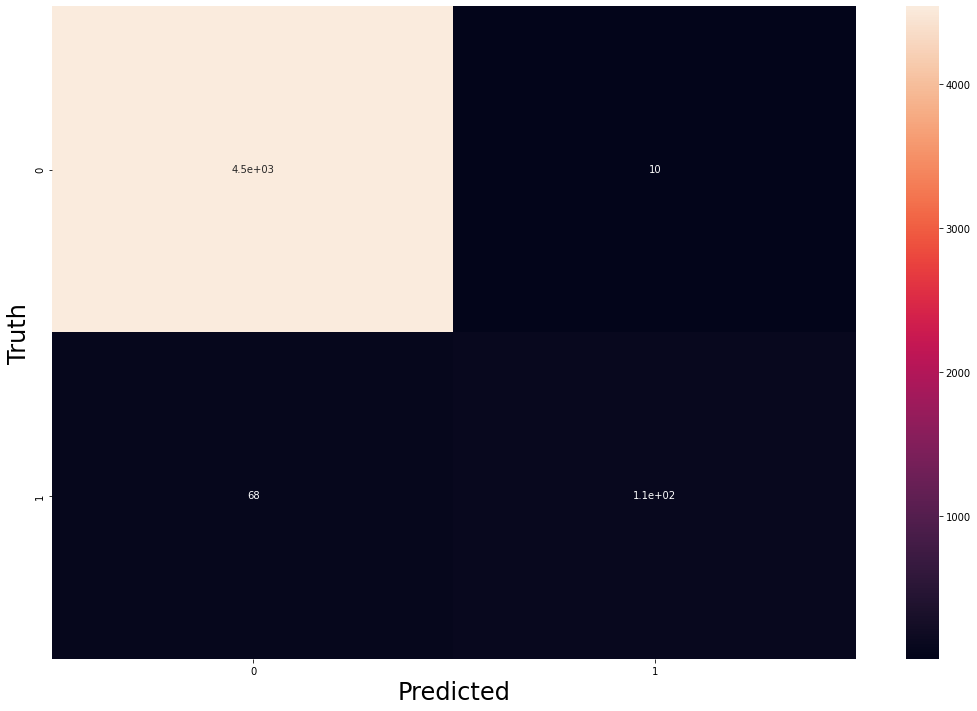

In [ ]:
lr_model = LogisticRegression(max_iter=1000000)
lr_model.fit(x_train,y_train)
get_score(lr_model,x_test,y_test)
evaluate_model(lr_model,x_test,y_test)

#### Cross Validation

In [27]:
model = RandomForestClassifier(n_estimators=400)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.9963 (+/- 0.00)
[0.99460831 0.99555978 0.99714558 0.99809705 0.99587563]


In [28]:
model = RandomForestClassifier(n_estimators=500)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.9963 (+/- 0.00)
[0.99460831 0.99587694 0.99714558 0.99777989 0.99619289]


## Retrieve Model

In [ ]:
import pickle

#filename = 'model.sav'
#pickle.dump(model, open(filename,'wb'))

#loaded_model = pickle.load(open(filename,'rb'))